Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

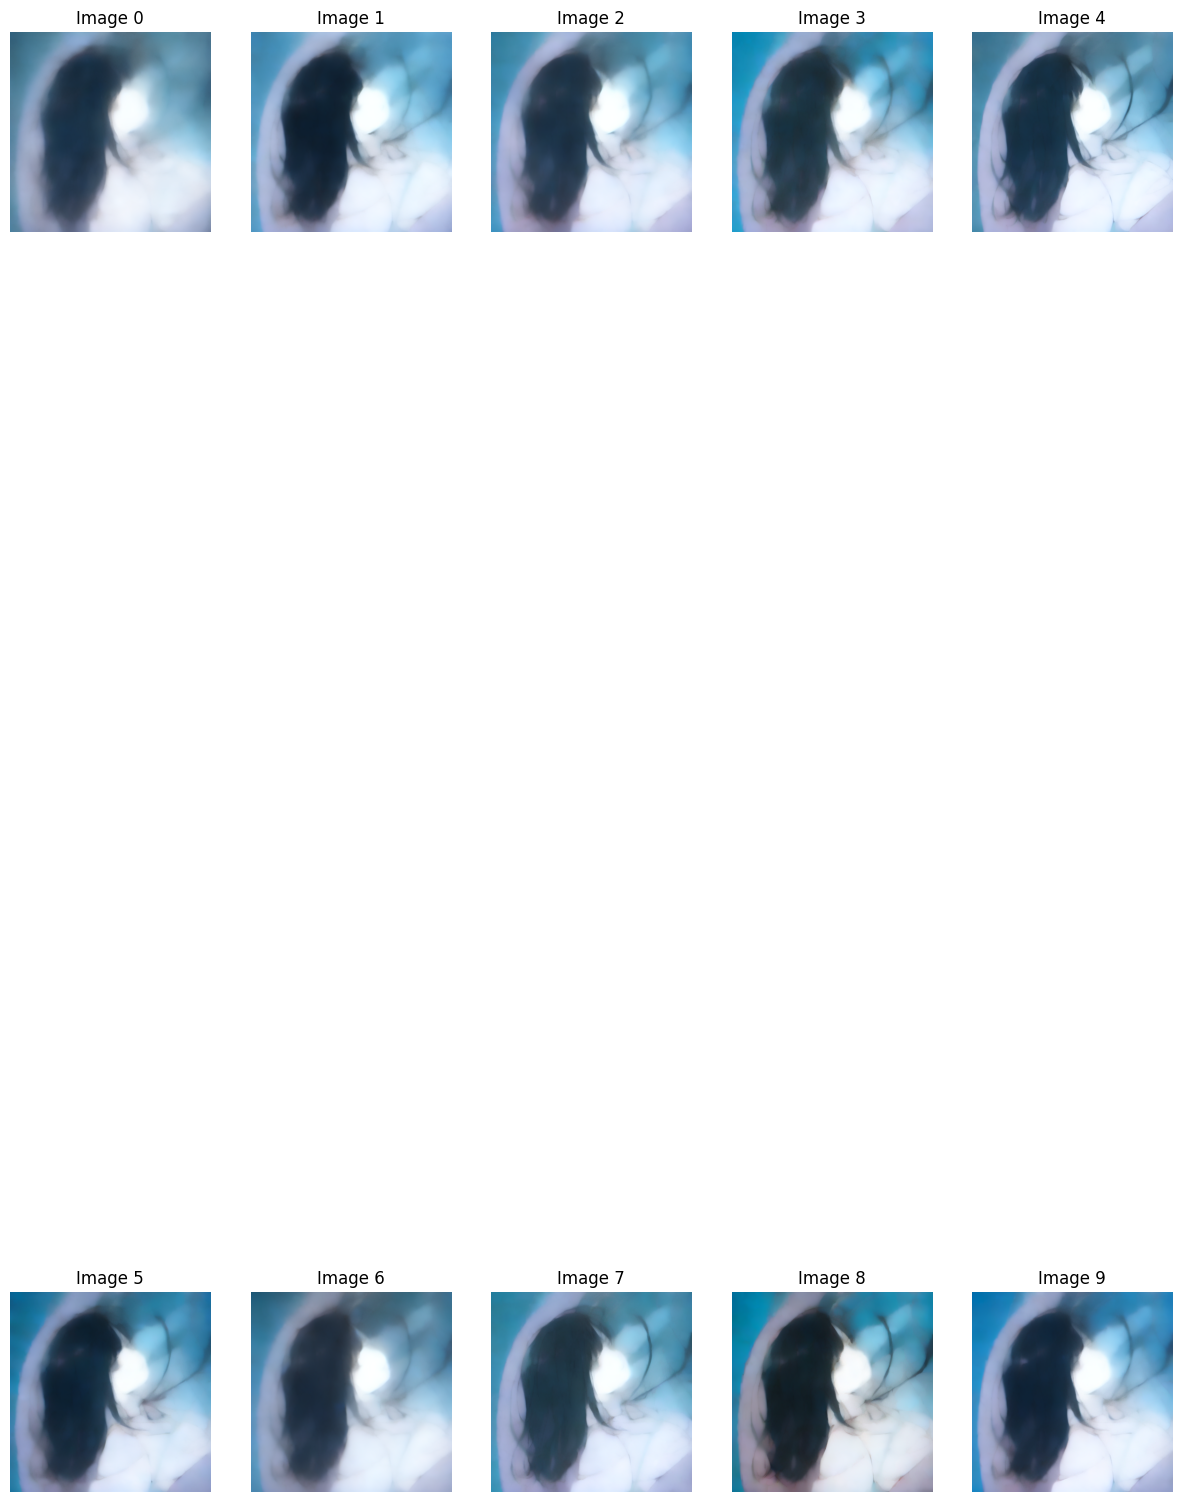

In [6]:
import PIL
import requests
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler

model_id = "timbrooks/instruct-pix2pix"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker=None)
pipe.to("cuda")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

url = "https://raw.githubusercontent.com/timothybrooks/instruct-pix2pix/main/imgs/example.jpg"
def load_image_local(path):
    image = PIL.Image.open(path)
    image = PIL.ImageOps.exif_transpose(image)
    image = image.convert("RGB")
    return image
image = load_image_local('wEnUjyy-_400x400.jpg')

import matplotlib.pyplot as plt
import numpy as np

prompt = "sadness"
samples = []
for _ in range(10):
    images = pipe(prompt, image=image, num_inference_steps=2, image_guidance_scale=1).images
    samples.append(images[0])

# Display in a grid
fig, axs = plt.subplots(2, 5, figsize=(15, 30))
for i, ax in enumerate(axs.flat):
    ax.imshow(np.array(samples[i]))
    ax.axis('off')
    ax.set_title(f'Image {i}')
plt.show()


In [31]:

samples[15].save("output.jpg")

